In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

C:\Users\shrad\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
acq_data = ['Id', 'chan','Name', 'IntRate', 'UnpaidPrinciple', 'LoanDur', 'date_1', 'Payment_one', 'LTV', 'CLTV',
           'Borrow', 'DTI', 'credit_score', 'homeloan','loanreason', 'prop_type', 'No_units', 'status', 'state','address',
           'Mortgage','type','creditscore1', 'Mortgagetype','Mort'];


perf_data = ['Id','month','col3','curintrate','col5','Age','maturity_date','remaining_time','col9','col10','col11','flag','col13',
            'date','lastpaymentdate','closureDate','col17','col18','col19','col20','col21','col22','col23','col24','col25',
            'col26','col27','col28','col29','col30']

In [3]:
processed_acq = pd.read_csv('2000Q1'+'/Acquisition_2000Q1.txt', sep = '|',names = acq_data,index_col=False)
processed_per = pd.read_csv('2000Q1'+'/Performance_2000Q1.txt',sep = '|', names = perf_data, usecols=[0, 15], index_col=False)

In [4]:
processed_per.drop_duplicates(subset='Id', keep='last', inplace=True)
new_data = pd.merge(processed_acq, processed_per, on='Id', how='inner')

In [5]:
# new_data = 

In [6]:
new_data['closureDate'].fillna(0,inplace=True)
new_data.loc[new_data['closureDate'] != 0, 'closureDate'] = 1

In [7]:
new_data['closureDate'] = new_data['closureDate'].astype(int)


In [8]:
new_data.drop(['date_1','Payment_one'], axis=1, inplace =True)
new_data.drop(['Mortgage','Mortgagetype','creditscore1','type','Id'], axis=1, inplace=True)

In [9]:
def getdummies(data):
    col = data.columns[data.isnull().any()]
    new_col = data[col]
    
    
    data.drop(new_col.columns, axis=1, inplace=True)
    objecttype = data.select_dtypes(include=['object'])
    cols = data.drop(objecttype.columns,axis=1)
    
    newdata = pd.DataFrame()
    for i in objecttype.columns:
        temp = pd.get_dummies(objecttype[i],drop_first=True)
        newdata = pd.concat([newdata,temp],axis=1)
        
    data = pd.concat([cols, newdata, new_col],axis=1).reset_index(drop=True)
    return data

In [10]:
def deleteemptyrow(data):
    col = data.columns[data.isnull().any()]
    cnt = 0
    print len(col)
    for name in col:
        print cnt
        cnt += 1
        
        data = data[~data[name].isnull()]
    return data

In [11]:
def fillnan(data):
    columns = data.columns[data.isnull().any()]
    for name in columns:
        y = data.loc[data[name].notnull(),name].values
        x = data.loc[data[name].notnull()].drop(columns,axis=1).values
        x_test = data.loc[data[name].isnull()].drop(columns,axis=1).values
        
        if data[name].dtypes == 'object':
            model = RandomForestClassifier(n_estimators=400, max_depth=3)
            model.fit(x,y)
            data.loc[data[name].isnull(), name] = model.predict(x_test)
        else:
            model = RandomForestRegressor(n_estimators=400,max_depth=3)
            model.fit(x,y)
            data.loc[data[name].isnull(),name] = model.predict(x_test)
    return data
        

In [12]:
new_data = getdummies(new_data)

In [13]:
print new_data

        IntRate  UnpaidPrinciple  LoanDur  No_units  address  closureDate  C  \
0         8.000            75000      360         1      173            0  0   
1         7.875            55000      180         1      208            0  0   
2         7.750           123000      360         1      630            0  1   
3         8.500            51000      360         1      316            0  0   
4         8.750           242000      360         1      335            0  1   
5         8.250           240000      360         1      483            0  1   
6         7.500            52000      180         1      347            0  1   
7         7.625           225000      360         1      980            0  0   
8         8.000           120000      360         1       63            0  1   
9         8.000           130000      360         1      300            0  0   
10        8.375           107000      360         1      633            0  1   
11        8.000            37000      18

In [14]:
new_data.drop(['LTV','CLTV','Borrow','DTI'],axis=1,inplace=True)

In [15]:
new_data = deleteemptyrow(new_data)

1
0


In [16]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

In [17]:
y = new_data['closureDate'].values
X = new_data.drop(['closureDate'],axis = 1).values
x_sampled,y_sampled = sm.fit_sample(X,y)


In [18]:
def random_forest_classifier(features,classification):
    features_train, features_test, classification_train, classification_test = train_test_split(features,classification,test_size=0.25,random_state=0)
    classifier = RandomForestClassifier(n_estimators=200)

    classifier = classifier.fit(features_train,classification_train)
    class_prediction = classifier.predict(features_test)

    x = list(range(len(class_prediction)))

    print class_prediction
    plt.scatter(x,class_prediction,color='red')

    plt.plot(x,classification_test,color='blue')


    plt.xticks(())
    plt.yticks(())
    plt.show()


    print("error mse")
    print(mean_squared_error(classification_test,class_prediction))
    print("variance score: 1 is perfect prediction")
    print(r2_score(classification_test,class_prediction))

    print(classification_report(classification_test,class_prediction))

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sk
import matplotlib.pyplot as plt

[0 0 1 ..., 1 1 0]


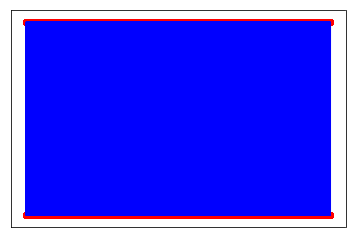

error mse
0.00739649448542
variance score: 1 is perfect prediction
0.970406025753
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     48736
          1       1.00      0.99      0.99     50365

avg / total       0.99      0.99      0.99     99101



In [20]:
random_forest_classifier(x_sampled,y_sampled)

In [ ]:
from sklearn import svm
def svm_classifier(features,classification):
    features_train, features_test, classification_train, classification_test = train_test_split(features,classification,test_size=0.25,random_state=0)
    classifier = svm.SVC(kernel='linear',C=1.0,gamma=1)

    classifier = classifier.fit(features_train,classification_train)
#     print(classifier.score(features_train,classification_train))
    class_prediction = classifier.predict(features_test)

    x = list(range(len(class_prediction)))

    print classification_test
    print class_prediction
    plt.scatter(x,class_prediction,color='red')

    plt.plot(x,classification_test,color='blue')


    plt.xticks(())
    plt.yticks(())
    plt.show()


    print("error mse")
    print(mean_squared_error(classification_test,class_prediction))
    print("variance score: 1 is perfect prediction")
    print(r2_score(classification_test,class_prediction))

    print(classification_report(classification_test,class_prediction))

# random_forest_classifier(features,classification)

# logistic_regression(features,classification)

In [ ]:
svm_classifier(x_sampled,y_sampled)